**PREDICTING THE PERCENTAGE OF MARKS THAT A STUDENT IS EXPECTED TO SCORE BASED ON THE NUMBER OF HOURS THEY STUDIED**

**THE SPARKS FOUNDATION INTERNSHIP PROJECT**

**made by: Szimonetta Farkas | Data Scientist**

**Simple Linear Regression with Python Scikit Learn**

We want to define what the predicted score will be for a student who studies for 9.25 hours a day.
We use simple linear regression to solve this task as it involves only 2 variables. 

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Loading Dataset
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
dataset = pd.read_csv(url)
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
# Looking for a correlation
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
# Strong positive correlation between the Hours and Scores.

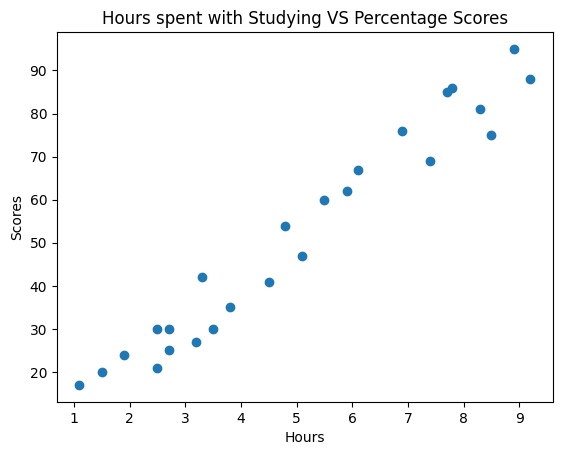

In [14]:
# Plotting the distribution of scores.
plt.scatter(x = dataset['Hours'], y = dataset['Scores'])
plt.title('Hours spent with Studying VS Percentage Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [15]:
# Positive Linear Relation between the 2 variables. 

In [17]:
# Defining dependent and independent variables
X = dataset.iloc[:,:-1].values  # independent variable, Hours
Y = dataset.iloc[:,1].values # dependent variable, Scores

In [21]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [22]:
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [29]:
# Splitting to Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [30]:
# Training the Model
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X_train, Y_train)

LinearRegression()

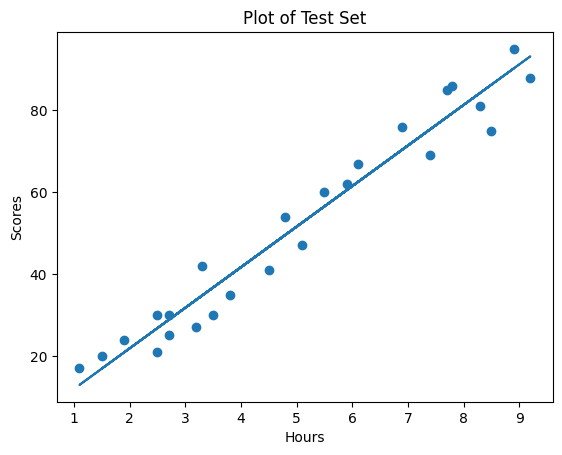

In [33]:
# Plotting for the Test Set
line = ln.coef_*X+ln.intercept_

plt.scatter(X,Y)
plt.title('Plot of Test Set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X,line)
plt.show()

In [34]:
# Making Predictions
print(X_test)
Y_pred = ln.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [41]:
# Comparing Actual Values VS Predicted Values
table = pd.DataFrame({'Actual' : Y_test, 'Predicted': Y_pred})
table

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [49]:
# Testing with own Data
hours = 9.25
prediction = ln.predict([[hours]])

In [50]:
print('A Student who studies', hours, 'hours a day is expected to have', prediction, 'Percentage Score.')

A Student who studies 9.25 hours a day is expected to have [93.69173249] Percentage Score.


In [52]:
# Evaluating the Model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975
